In [28]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Importing the dataset
dataset=pd.read_csv('./Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y= y.reshape(len(y),1)
print(X)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
sc_y =StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [31]:
#Training the SVR
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X,y)

c:\Users\senol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [32]:
#Predict a new result
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

C:\Users\senol\AppData\Local\Temp\ipykernel_25892\1542268162.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


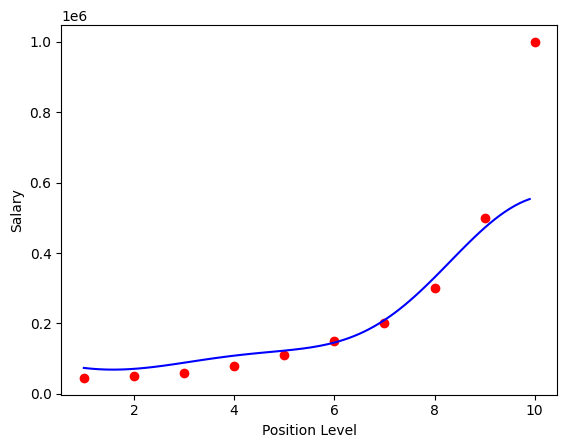

In [44]:
#Visualising the SVR results
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red")
plt.plot(X_grid,sc_y.inverse_transform(reg.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()